<a href="https://colab.research.google.com/github/Geethabhumireddy/DOH/blob/main/second_layer.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import files
uploaded = files.upload()


Saving merge_second_layer.csv to merge_second_layer.csv


In [2]:


import io
import pandas as pd
import numpy as np
from mpl_toolkits.mplot3d import Axes3D
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
d=pd.read_csv(io.BytesIO(uploaded['merge_second_layer.csv']))
d.head(5)

,SourceIP,DestinationIP,SourcePort,DestinationPort,TimeStamp,Duration,FlowBytesSent,FlowSentRate,FlowBytesReceived,FlowReceivedRate,...,PacketTimeCoefficientofVariation,ResponseTimeTimeVariance,ResponseTimeTimeStandardDeviation,ResponseTimeTimeMean,ResponseTimeTimeMedian,ResponseTimeTimeMode,ResponseTimeTimeSkewFromMedian,ResponseTimeTimeSkewFromMode,ResponseTimeTimeCoefficientofVariation,Label
0,192.168.20.191,176.103.130.131,50749,443,14-01-2020 15:49,95.081550,62311,655.342703,65358,687.388878,...,0.574626,0.001053,0.032457,0.027624,0.026854,0.026822,0.071187,0.024715,1.174948,Benign
1,192.168.20.191,176.103.130.131,50749,443,14-01-2020 15:50,122.309318,93828,767.136973,101232,827.672018,...,0.509047,0.001170,0.034200,0.024387,0.021043,0.026981,0.293297,-0.075845,1.402382,Benign
2,192.168.20.191,176.103.130.131,50749,443,14-01-2020 15:52,120.958413,38784,320.639127,38236,316.108645,...,0.732636,0.000785,0.028021,0.029238,0.026922,0.026855,0.248064,0.085061,0.958348,Benign
3,192.168.20.205,9.9.9.11,50224,443,30-03-2020 19:23,127.502031,952325,7469.096708,1334141,10463.684300,...,0.604676,0.001299,0.036046,0.012407,0.007977,0.000023,0.368722,0.343570,2.905219,Malicious
4,192.168.20.205,9.9.9.11,50230,443,30-03-2020 19:24,36.109819,17234,477.266308,28476,788.594371,...,1.738442,0.014743,0.121423,0.034108,0.015330,0.000341,0.463939,0.278091,3.559992,Malicious


In [3]:
d=d.dropna(axis=1, how='all')

In [4]:


#NUMERICAL ENCODING
d["SourceIP"] = d["SourceIP"].astype('category')
d["SourceIP"] = d["SourceIP"].cat.codes
d["DestinationIP"] = d["DestinationIP"].astype('category')
d["DestinationIP"] = d["DestinationIP"].cat.codes
d["TimeStamp"] = d["TimeStamp"].astype('category')
d["TimeStamp"] = d["TimeStamp"].cat.codes
d["Label"] = d["Label"].astype('category')
d["Label"] = d["Label"].cat.codes
d.head(5)


,SourceIP,DestinationIP,SourcePort,DestinationPort,TimeStamp,Duration,FlowBytesSent,FlowSentRate,FlowBytesReceived,FlowReceivedRate,...,PacketTimeCoefficientofVariation,ResponseTimeTimeVariance,ResponseTimeTimeStandardDeviation,ResponseTimeTimeMean,ResponseTimeTimeMedian,ResponseTimeTimeMode,ResponseTimeTimeSkewFromMedian,ResponseTimeTimeSkewFromMode,ResponseTimeTimeCoefficientofVariation,Label
0,2,1,50749,443,6,95.081550,62311,655.342703,65358,687.388878,...,0.574626,0.001053,0.032457,0.027624,0.026854,0.026822,0.071187,0.024715,1.174948,0
1,2,1,50749,443,7,122.309318,93828,767.136973,101232,827.672018,...,0.509047,0.001170,0.034200,0.024387,0.021043,0.026981,0.293297,-0.075845,1.402382,0
2,2,1,50749,443,8,120.958413,38784,320.639127,38236,316.108645,...,0.732636,0.000785,0.028021,0.029238,0.026922,0.026855,0.248064,0.085061,0.958348,0
3,3,5,50224,443,29,127.502031,952325,7469.096708,1334141,10463.684300,...,0.604676,0.001299,0.036046,0.012407,0.007977,0.000023,0.368722,0.343570,2.905219,1
4,3,5,50230,443,30,36.109819,17234,477.266308,28476,788.594371,...,1.738442,0.014743,0.121423,0.034108,0.015330,0.000341,0.463939,0.278091,3.559992,1


In [5]:


#SPLITTING DATASET INTO INDEPENDENT AND DEPENDENT VARIABLES
np.set_printoptions(suppress=True)
X=d.iloc[:,:-1].values
Y=d.iloc[:,-1].values

#SPLITTING DATASET INTO TRAINING AND TESTING DATA
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
X_train, X_test, y_train, y_test =train_test_split(X,Y,test_size=0.3)
X_test[0]

array([    2.        ,     1.        , 52491.        ,   443.        ,
          18.        ,   121.185931  , 35194.        ,   290.4132494 ,
       37434.        ,   308.8972432 ,  7686.456414  ,    87.67243816,
         136.518797  ,   114.        ,    54.        ,     0.77055449,
           0.94121709,     0.64220049,  1166.565407  ,    34.15502024,
          56.05765245,    62.002614  ,    76.861315  ,    -0.52217462,
          -0.60909531,     0.60928381,     0.00073814,     0.02716865,
           0.02796183,     0.0269115 ,     0.026917  ,     0.11597928,
           0.03845732,     0.97163318])

In [6]:
d = d.fillna(d.mean())

In [7]:
ACCURACY_SCORE={}

In [8]:


#Information gain
from sklearn.tree import DecisionTreeClassifier
clf_gini=DecisionTreeClassifier(criterion="entropy")
y_pred_IG=clf_gini.fit(X_train,y_train).predict(X_test)
print(y_pred_IG)

[0 1 1 1 1 0 1 1 1 0 0 0 1 0 0]


In [9]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
print(confusion_matrix(y_test,y_pred_IG))
print(accuracy_score(y_test,y_pred_IG)*100)
print(classification_report(y_test,y_pred_IG))


[[6 0]
 [1 8]]
93.33333333333333
              precision    recall  f1-score   support

           0       0.86      1.00      0.92         6
           1       1.00      0.89      0.94         9

    accuracy                           0.93        15
   macro avg       0.93      0.94      0.93        15
weighted avg       0.94      0.93      0.93        15



In [10]:
ACCURACY_SCORE['INFORMATION GAIN']=accuracy_score(y_test,y_pred_IG)*100

In [11]:
#GINI INDEX
from sklearn.tree import DecisionTreeClassifier
clf_gini=DecisionTreeClassifier(criterion="gini")
y_pred_GINI=clf_gini.fit(X_train,y_train).predict(X_test)
print(y_pred_GINI)


[0 1 1 1 1 0 1 1 1 0 0 0 1 0 0]


In [12]:
print(confusion_matrix(y_test,y_pred_GINI))
print(accuracy_score(y_test,y_pred_GINI)*100)
print(classification_report(y_test,y_pred_GINI))

[[6 0]
 [1 8]]
93.33333333333333
              precision    recall  f1-score   support

           0       0.86      1.00      0.92         6
           1       1.00      0.89      0.94         9

    accuracy                           0.93        15
   macro avg       0.93      0.94      0.93        15
weighted avg       0.94      0.93      0.93        15



[Text(0.6, 0.8333333333333334, 'x[1] <= 2.5\ngini = 0.5\nsamples = 50\nvalue = [25, 25]'),
 Text(0.4, 0.5, 'x[27] <= 0.56\ngini = 0.074\nsamples = 26\nvalue = [25, 1]'),
 Text(0.5, 0.6666666666666667, 'True  '),
 Text(0.2, 0.16666666666666666, 'gini = 0.0\nsamples = 25\nvalue = [25, 0]'),
 Text(0.6, 0.16666666666666666, 'gini = 0.0\nsamples = 1\nvalue = [0, 1]'),
 Text(0.8, 0.5, 'gini = 0.0\nsamples = 24\nvalue = [0, 24]'),
 Text(0.7, 0.6666666666666667, '  False')]

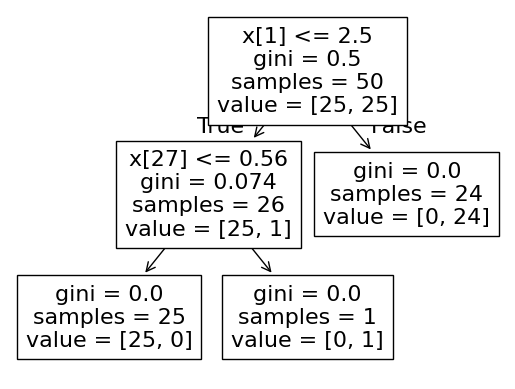

In [13]:
from sklearn import tree
tr=tree.DecisionTreeClassifier()
tr.fit(X,Y)
tree.plot_tree(tr)

In [14]:
ACCURACY_SCORE['GINI INDEX']=accuracy_score(y_test,y_pred_GINI)*100

In [15]:
#RANDOM FOREST CLASSIFIER
from sklearn.ensemble import RandomForestClassifier
clf=RandomForestClassifier(n_estimators=2)
clf.fit(X_train,y_train)
y_pred_RF=clf.predict(X_test)
print(y_pred_RF)

[0 1 1 1 0 0 1 1 1 0 0 0 1 0 0]


In [16]:

y_pred_cat=[]
for x in y_pred_RF:
  if x==0:
    y_pred_cat.append("Benign")
  else :
    y_pred_cat.append("Malicious")
y_pred_cat

['Benign',
 'Malicious',
 'Malicious',
 'Malicious',
 'Benign',
 'Benign',
 'Malicious',
 'Malicious',
 'Malicious',
 'Benign',
 'Benign',
 'Benign',
 'Malicious',
 'Benign',
 'Benign']

In [17]:
print(confusion_matrix(y_test,y_pred_RF))
print(accuracy_score(y_test,y_pred_RF)*100)
print(classification_report(y_test,y_pred_RF))

[[6 0]
 [2 7]]
86.66666666666667
              precision    recall  f1-score   support

           0       0.75      1.00      0.86         6
           1       1.00      0.78      0.88         9

    accuracy                           0.87        15
   macro avg       0.88      0.89      0.87        15
weighted avg       0.90      0.87      0.87        15



In [18]:
ACCURACY_SCORE['Random Forest']=accuracy_score(y_test,y_pred_RF)*100

In [19]:
#NAIVE BAYES
from sklearn.naive_bayes import GaussianNB
gnb=GaussianNB()
y_pred_NB=gnb.fit(X_train,y_train).predict(X_test)
print(y_pred_NB)


[0 1 1 1 1 0 1 1 1 0 0 0 1 0 0]


In [21]:
print(confusion_matrix(y_test,y_pred_NB))
print(accuracy_score(y_test,y_pred_NB)*100)
print(classification_report(y_test,y_pred_NB))

[[6 0]
 [1 8]]
93.33333333333333
              precision    recall  f1-score   support

           0       0.86      1.00      0.92         6
           1       1.00      0.89      0.94         9

    accuracy                           0.93        15
   macro avg       0.93      0.94      0.93        15
weighted avg       0.94      0.93      0.93        15



In [22]:
ACCURACY_SCORE['Naive bayes']=accuracy_score(y_test,y_pred_NB)*10

In [23]:
#KNN
from sklearn.neighbors import KNeighborsClassifier
knn =KNeighborsClassifier(n_neighbors=3)
y_pred_KNN=knn.fit(X_train,y_train).predict(X_test)
print(y_pred_KNN)

[0 1 0 1 1 0 1 1 1 0 0 0 1 0 0]


In [24]:

print(confusion_matrix(y_test,y_pred_KNN))
print(accuracy_score(y_test,y_pred_KNN)*100)
print(classification_report(y_test,y_pred_KNN))

[[6 0]
 [2 7]]
86.66666666666667
              precision    recall  f1-score   support

           0       0.75      1.00      0.86         6
           1       1.00      0.78      0.88         9

    accuracy                           0.87        15
   macro avg       0.88      0.89      0.87        15
weighted avg       0.90      0.87      0.87        15



In [25]:
ACCURACY_SCORE['KNN']=accuracy_score(y_test,y_pred_KNN)*100

In [26]:
#GRADIENT BOOST
from sklearn.ensemble import GradientBoostingClassifier
lr_rate= 0.5
gb_clf = GradientBoostingClassifier(n_estimators=20, learning_rate=lr_rate, random_state=0)
gb_clf.fit(X_train, y_train)
y_pred_GB=gb_clf.predict(X_test)
print(y_pred_GB)

[0 1 1 1 1 0 1 1 1 0 0 0 1 0 0]


In [27]:
print(confusion_matrix(y_test,y_pred_GB))
print(accuracy_score(y_test,y_pred_GB)*100)
print(classification_report(y_test,y_pred_GB))

[[6 0]
 [1 8]]
93.33333333333333
              precision    recall  f1-score   support

           0       0.86      1.00      0.92         6
           1       1.00      0.89      0.94         9

    accuracy                           0.93        15
   macro avg       0.93      0.94      0.93        15
weighted avg       0.94      0.93      0.93        15



In [28]:
ACCURACY_SCORE['GRADIENT BOOST']=accuracy_score(y_test,y_pred_GB)*100
print(ACCURACY_SCORE)

{'INFORMATION GAIN': 93.33333333333333, 'GINI INDEX': 93.33333333333333, 'Random Forest': 86.66666666666667, 'Naive bayes': 9.333333333333334, 'KNN': 86.66666666666667, 'GRADIENT BOOST': 93.33333333333333}
